In [1]:
## Connect to DB server on AWS
import mysql.connector 
import config
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = 'crime_nyc'
)
cursor = cnx.cursor()
cnx.database = 'crime_nyc'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools

In [3]:
query = ("SELECT * FROM crime2019;")
cursor.execute(query)
#cursor.close()
#cnx.close()

In [4]:
result = cursor.fetchall()

In [5]:
df = pd.DataFrame(result)
df.columns = [x[0] for x in cursor.description]
df.replace(np.nan,0,inplace=True)
df

,index,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,...,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,zipcode,med_income
0,0,203078287,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,M,...,0,25-44,M,BLACK HISPANIC,990563,203120,40.724200,-73.977226,10009,59929.0
1,1,203072424,09/30/2019,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,Q,...,0,18-24,M,BLACK,1040611,190715,40.689974,-73.796769,11433,42887.0
2,2,203061215,09/30/2019,905.0,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U3,M,S,...,0,18-24,M,WHITE,962989,160112,40.606129,-74.076570,10305,70758.0
3,3,203061218,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601502,F,S,...,0,25-44,M,WHITE HISPANIC,962822,174282,40.645023,-74.077217,10301,56848.0
4,4,203063729,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,Q,...,0,18-24,M,ASIAN / PACIFIC ISLANDER,1035521,188624,40.684266,-73.815138,11420,59832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167960,167960,191717230,01/01/2019,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,Q,...,0,25-44,M,WHITE HISPANIC,1013749,204160,40.727008,-73.893572,11379,69843.0
167961,167961,191717236,01/01/2019,744.0,BAIL JUMPING 3,359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2155500,M,Q,...,0,25-44,M,WHITE HISPANIC,1032428,198872,40.712411,-73.826217,11415,63549.0
167962,167962,191717241,01/01/2019,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,S,...,0,25-44,F,BLACK,952218,173159,40.641908,-74.115423,10310,61925.0
167963,167963,191719207,01/01/2019,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,...,2,25-44,F,WHITE HISPANIC,1006918,238567,40.821466,-73.918101,10451,26754.0


# Crime genders

In [6]:
df['LAW_CAT_CD'].value_counts()

M    99997
F    64303
V     2345
0      962
I      358
Name: LAW_CAT_CD, dtype: int64

# Crime boroughs

In [7]:
df['ARREST_BORO'].value_counts()

K    45842
M    41793
B    38309
Q    34864
S     7157
Name: ARREST_BORO, dtype: int64

# Crime types stats

In [9]:
df['OFNS_DESC'].describe()

count                           167965
unique                              65
top       ASSAULT 3 & RELATED OFFENSES
freq                             24687
Name: OFNS_DESC, dtype: object

In [10]:
df['OFNS_DESC'].value_counts()

ASSAULT 3 & RELATED OFFENSES       24687
PETIT LARCENY                      16800
DANGEROUS DRUGS                    16750
FELONY ASSAULT                     11610
VEHICLE AND TRAFFIC LAWS           11585
                                   ...  
DISRUPTION OF A RELIGIOUS SERV         4
HOMICIDE-NEGLIGENT-VEHICLE             3
PARKING OFFENSES                       3
NYS LAWS-UNCLASSIFIED VIOLATION        2
UNLAWFUL POSS. WEAP. ON SCHOOL         1
Name: OFNS_DESC, Length: 65, dtype: int64

In [11]:
#total of Robbery = 6859
df_robbery = df[df['OFNS_DESC']=='ROBBERY']
df_robbery

,index,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,...,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,zipcode,med_income
0,0,203078287,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,M,...,0,25-44,M,BLACK HISPANIC,990563,203120,40.724200,-73.977226,10009,59929.0
3,3,203061218,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601502,F,S,...,0,25-44,M,WHITE HISPANIC,962822,174282,40.645023,-74.077217,10301,56848.0
4,4,203063729,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,Q,...,0,18-24,M,ASIAN / PACIFIC ISLANDER,1035521,188624,40.684266,-73.815138,11420,59832.0
27,27,203061114,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,...,0,18-24,M,BLACK,1001139,192775,40.695792,-73.939096,11206,28559.0
32,32,203061143,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,M,...,0,18-24,M,BLACK,989869,207927,40.737395,-73.979725,10009,59929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167827,167827,191735613,01/01/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,K,...,0,25-44,M,BLACK,1018124,187785,40.682047,-73.877869,11208,35079.0
167850,167850,191717166,01/01/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,...,0,25-44,M,BLACK,999507,190206,40.688743,-73.944987,11216,43996.0
167874,167874,191733628,01/01/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,Q,...,0,45-64,M,WHITE HISPANIC,1021183,214625,40.755704,-73.866693,11369,53617.0
167882,167882,191720920,01/01/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,K,...,0,25-44,M,BLACK,1018124,187785,40.682047,-73.877869,11208,35079.0


In [12]:
#where med_income is nan, replace it with 0
df_robbery["med_income"].values.max()

170630.0

# Overall med_income stats

In [15]:
print(df['med_income'].values.max())
df['med_income'].describe()

230952.0


count    167965.000000
mean      47742.072342
std       26439.249081
min           0.000000
25%       30288.000000
50%       42170.000000
75%       59229.000000
max      230952.000000
Name: med_income, dtype: float64

# male arrests

In [17]:
# Arrested males
df['male'] = df.LAW_CAT_CD == 'M'
df
del df['male']
df

,index,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,...,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,zipcode,med_income
0,0,203078287,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,M,...,0,25-44,M,BLACK HISPANIC,990563,203120,40.724200,-73.977226,10009,59929.0
1,1,203072424,09/30/2019,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,Q,...,0,18-24,M,BLACK,1040611,190715,40.689974,-73.796769,11433,42887.0
2,2,203061215,09/30/2019,905.0,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U3,M,S,...,0,18-24,M,WHITE,962989,160112,40.606129,-74.076570,10305,70758.0
3,3,203061218,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601502,F,S,...,0,25-44,M,WHITE HISPANIC,962822,174282,40.645023,-74.077217,10301,56848.0
4,4,203063729,09/30/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,Q,...,0,18-24,M,ASIAN / PACIFIC ISLANDER,1035521,188624,40.684266,-73.815138,11420,59832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167960,167960,191717230,01/01/2019,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,Q,...,0,25-44,M,WHITE HISPANIC,1013749,204160,40.727008,-73.893572,11379,69843.0
167961,167961,191717236,01/01/2019,744.0,BAIL JUMPING 3,359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2155500,M,Q,...,0,25-44,M,WHITE HISPANIC,1032428,198872,40.712411,-73.826217,11415,63549.0
167962,167962,191717241,01/01/2019,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,S,...,0,25-44,F,BLACK,952218,173159,40.641908,-74.115423,10310,61925.0
167963,167963,191719207,01/01/2019,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,...,2,25-44,F,WHITE HISPANIC,1006918,238567,40.821466,-73.918101,10451,26754.0


In [18]:
# zipcode+med_income
df1 = df_robbery[['zipcode','med_income']]
df1

,zipcode,med_income
0,10009,59929.0
3,10301,56848.0
4,11420,59832.0
27,11206,28559.0
32,10009,59929.0
...,...,...
167827,11208,35079.0
167850,11216,43996.0
167874,11369,53617.0
167882,11208,35079.0


In [19]:
df2 = df_robbery[['zipcode','OFNS_DESC']]
df2

,zipcode,OFNS_DESC
0,10009,ROBBERY
3,10301,ROBBERY
4,11420,ROBBERY
27,11206,ROBBERY
32,10009,ROBBERY
...,...,...
167827,11208,ROBBERY
167850,11216,ROBBERY
167874,11369,ROBBERY
167882,11208,ROBBERY


In [20]:
df_zip_ofns_count = df2.groupby("zipcode").count().sort_values('OFNS_DESC',ascending=False)
df_zip_ofns_count

,OFNS_DESC
zipcode,
11208,284
10457,187
10454,160
10451,145
10459,133
...,...
11004,1
11105,1
11234,1


# Zipcode+robbery+medium income

In [22]:
df_merged = df_zip_ofns_count.merge(df1, on='zipcode')
df_merged

,zipcode,OFNS_DESC,med_income
0,11208,284,35079.0
1,11208,284,35079.0
2,11208,284,35079.0
3,11208,284,35079.0
4,11208,284,35079.0
...,...,...,...
6854,11004,1,81709.0
6855,11105,1,57525.0
6856,11234,1,68431.0
6857,11374,1,52532.0


In [24]:
df_new = df_merged.drop_duplicates()
df_new

,zipcode,OFNS_DESC,med_income
0,11208,284,35079.0
284,10457,187,24949.0
471,10454,160,20232.0
631,10451,145,26754.0
776,10459,133,24461.0
...,...,...,...
6854,11004,1,81709.0
6855,11105,1,57525.0
6856,11234,1,68431.0
6857,11374,1,52532.0


In [74]:
#added a new column for income_range: high income >=70000
df_new['income_range'] = np.where(df_new['med_income']>=70000, 'high med_income','mid or low med_income')
df_new


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zipcode,OFNS_DESC,med_income,income_range
0,11208,284,35079.0,mid or low med_income
284,10457,187,24949.0,mid or low med_income
471,10454,160,20232.0,mid or low med_income
631,10451,145,26754.0,mid or low med_income
776,10459,133,24461.0,mid or low med_income
...,...,...,...,...
6854,11004,1,81709.0,high med_income
6855,11105,1,57525.0,mid or low med_income
6856,11234,1,68431.0,mid or low med_income
6857,11374,1,52532.0,mid or low med_income


# high income avg robbery rate

In [75]:
df_high_income = df_new[df_new['income_range'] == 'high med_income']
print(df_high_income)

df_high_income['OFNS_DESC'].mean()

     zipcode  OFNS_DESC  med_income     income_range
2106   10003        109     92540.0  high med_income
4059   10019         68     84424.0  high med_income
4195   11201         67     95369.0  high med_income
4328   10011         66    104238.0  high med_income
4881   10014         57    108483.0  high med_income
5099   11217         50     81862.0  high med_income
5283   10018         42    104635.0  high med_income
5447   10016         40    105324.0  high med_income
5602   10162         38    168667.0  high med_income
5640   10065         35    115519.0  high med_income
5744   10023         34    103534.0  high med_income
5992   10013         26     83725.0  high med_income
6069   11231         25     78174.0  high med_income
6189   11109         23    125871.0  high med_income
6235   10028         22    104638.0  high med_income
6257   10001         22     81671.0  high med_income
6279   10305         22     70758.0  high med_income
6441   10306         17     75807.0  high med_

20.3953488372093

In [78]:
df_new['OFNS_DESC'].mean()

40.585798816568044

In [92]:
df_mid_low_income = df_new[df_new['income_range'] == 'high med_income']
print(df_high_income)

df_high_income['OFNS_DESC'].mean()

     zipcode  OFNS_DESC  med_income     income_range
2106   10003        109     92540.0  high med_income
4059   10019         68     84424.0  high med_income
4195   11201         67     95369.0  high med_income
4328   10011         66    104238.0  high med_income
4881   10014         57    108483.0  high med_income
5099   11217         50     81862.0  high med_income
5283   10018         42    104635.0  high med_income
5447   10016         40    105324.0  high med_income
5602   10162         38    168667.0  high med_income
5640   10065         35    115519.0  high med_income
5744   10023         34    103534.0  high med_income
5992   10013         26     83725.0  high med_income
6069   11231         25     78174.0  high med_income
6189   11109         23    125871.0  high med_income
6235   10028         22    104638.0  high med_income
6257   10001         22     81671.0  high med_income
6279   10305         22     70758.0  high med_income
6441   10306         17     75807.0  high med_

20.3953488372093

# Graphing

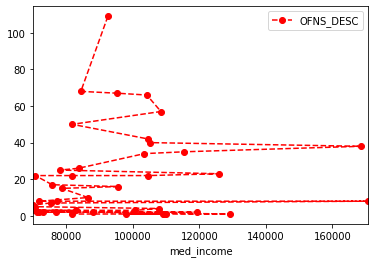

In [86]:
df_high_income.plot(x='med_income', y='OFNS_DESC',color='r',linestyle='dashed',marker='o')


# Hypothesis Testing

In [93]:
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math
import seaborn as sns
import matplotlib.pyplot as plt


20.3953488372093

In [137]:


sample = df_high_income['OFNS_DESC']
    
# population mean (mu) (higher)
mu = 40.585798816568044

# Sample mean (x̄) using NumPy mean()
x_bar = sample.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample,ddof=1)

# Sample size (n)
n = len(sample)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu

# Print the findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)

The sample contains 43 observations, having a mean of 20.3953488372093 and a standard deviation (sigma) =  24.362480457500254 , with 42 degrees of freedom. The difference between sample and population means is: -20.190449979358743


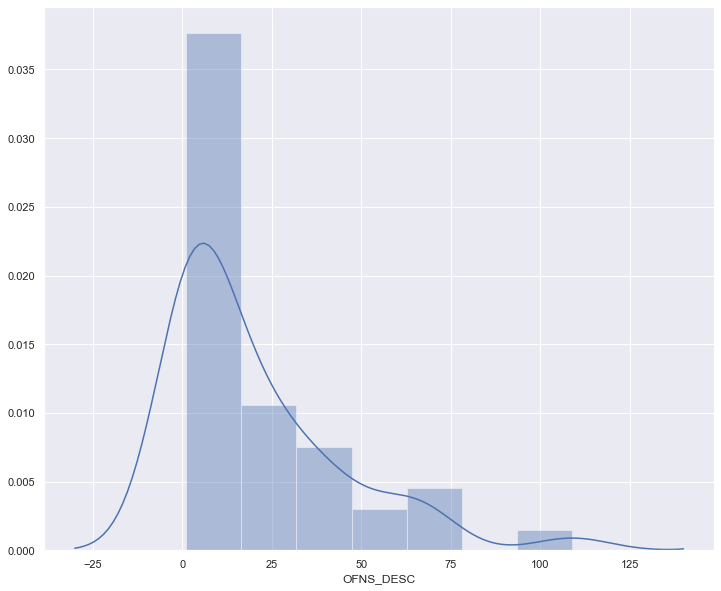

In [138]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample)


In [139]:
# hypothesis
#H0: medium income has no relationship on #of robberies. mu = 40.6
#H1: higher med income lowers robberies rate. mu < 40.6

In [140]:
# Calculate Sigma
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

-5.434489100919094

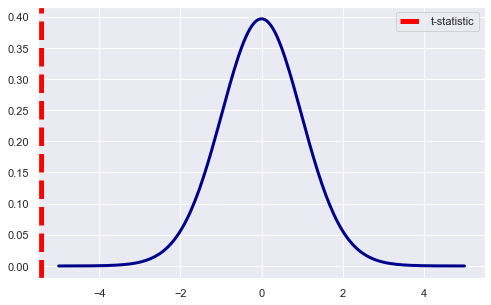

In [141]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')
ax.legend()
plt.show()

In [142]:
# n the case of a one-sided alternative, A negative T-statistic implies that the sample mean (x bar = 20.4) is less than the hypothesized mean (40.6). 
# This would be evidence against the null hypothesis

# Calculate critical t-value (find rejection region) (alpha = 0.05)
# calculate t critical using: scipy.stats.t.ppf(1-alpha, df)
# for H0 to be true, t_crit means most values would fall under 1.682
t_crit = np.round(stats.t.ppf(1 - 0.05, df=df),3)
t_crit

1.682

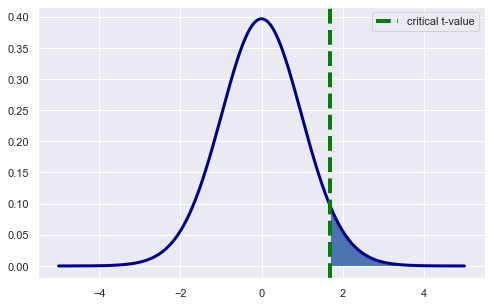

In [143]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')


ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.legend()
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)
plt.show()

In [144]:
results = stats.ttest_1samp(a= sample, popmean= mu)         
print ("The t-value for sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 4))
#  Print results
# The t-value for sample is 3.58 and the p-value is 0.0015

The t-value for sample is -5.43 and the p-value is 0.0
